# Learning graph from data

In [11]:
## import module
from CGmodelselection.graph import get_graph_from_data

**Specify the data to be used**

Specify filename an optionally columns that shall not be loaded in the variable *drop*.

In [12]:
## chose one dataset here (or enter your own), list columns not to be loaded in variable <drop>
#filename = "unittest_data/australian-crabs.csv"
#drop =['index']

filename = "datasets/diet_proportions.csv"
drop = []

#filename = "datasets/titanic.csv"
#drop = ['PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch']

In [13]:
import pandas as pd
df = pd.read_csv(filename)#, sep=',')
df.head()#df.to_csv("datasets/girona_hgi_cormophyta.csv")
#df.identifiedby = df.identifiedby.fillna('nan')
#sorted(df.identifiedby.unique())

,Sex,Sample ID,Month,Season,Year,Site,Ad_Atlantic_Salmon,Ad_cutthroat_trout,Ad_dolly_varden,Ad_Chinook_salmon,...,Gasterosteiformes,Gobiesociformes,Osmeriformes,Perciformes,Petromyzontiformes,Pleuronectiformes,Rajiformes,Salmoniformes,Scorpaeniformes,Squaliformes
0,F,Pv12.032,5,spring,2012,Comox,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,F,Pv12.028,5,spring,2012,Comox,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,F,Pv12.024,5,spring,2012,Comox,0.0,0.0,0.0,0.0,...,3.703704,0.0,0.0,0.0,0.0,0.0,0.0,11.111111,0.0,0.0
3,F,Pv12.020,5,spring,2012,Comox,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,M,Pv12.034,5,spring,2012,Comox,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [14]:
df.columns

Index(['Sex', 'Sample ID', 'Month', 'Season', 'Year', 'Site',
       'Ad_Atlantic_Salmon', 'Ad_cutthroat_trout', 'Ad_dolly_varden',
       'Ad_Chinook_salmon',
       ...
       'Gasterosteiformes', 'Gobiesociformes', 'Osmeriformes', 'Perciformes',
       'Petromyzontiformes', 'Pleuronectiformes', 'Rajiformes',
       'Salmoniformes', 'Scorpaeniformes', 'Squaliformes'],
      dtype='object', length=103)

Disable autoscrolling for outputs.

In [15]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

**Learn the (weighted) graph**

/home/chris/anaconda3/lib/python3.6/site-packages/CGmodelselection/dataops.py:280: RuntimeWarning: invalid value encountered in true_divide
  Y[:, s] = (Y[:, s] - means[s] * np.ones(n)) / sigmas[s]


Filename: datasets/diet_proportions.csv
Using a dataset with 547 samples, 4 discrete and 99 continuous variables.
Discrete Variables: ['Sex', 'Sample ID', 'Season', 'Site']
Continuous Variables: ['Month', 'Year', 'Ad_Atlantic_Salmon', 'Ad_cutthroat_trout', 'Ad_dolly_varden', 'Ad_Chinook_salmon', 'Ad_chum_salmon', 'Ad_coho_salmon', 'Ad_pink_salmon', 'Ad_sockeye_salmon', 'Ad_steelhead', 'American_Shad', 'Atka_Mackerel', 'Bathyraja_interrupta', 'Bay_Goby', 'Bering_Flounder', 'Big_Skate', 'Blackbelly_Eelpout', 'Buffalo_Sculpin', 'Butter_Sole', 'Cabezon', 'California_Market_Squid', 'Capelin', 'China_Rockfish', 'Dover_Sole', 'Dungeness_crab', 'English_Sole', 'Eulachon', 'Giant_Pacific_Octopus', 'Giant_Wrymouth', 'Great_Sculpin', 'Juv_Atlantic_salmon', 'Juv_Chinook_salmon', 'Juv_chum_salmon', 'Juv_coho_salmon', 'Juv_cutthroat_trout', 'Juv_dolly_varden', 'Juv_pink_salmon_', 'Juv_sockeye_salmon', 'Juv_steelhead', 'Kelp_Greenling', 'Lingcod', 'Longfin_Smelt', 'Longspine_Combfish', 'Magister_armh

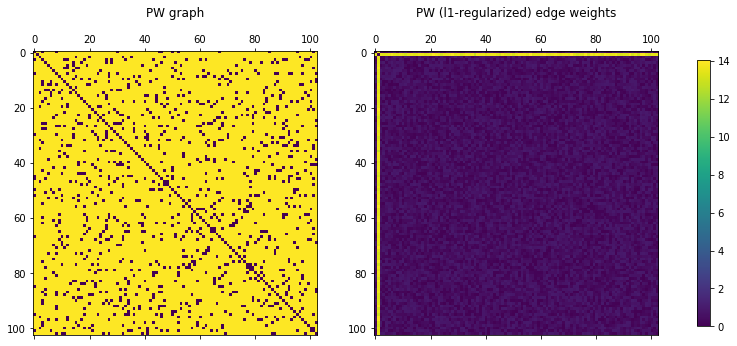

Legend:
0 - Sex
1 - Sample ID
2 - Season
3 - Site
4 - Month
5 - Year
6 - Ad_Atlantic_Salmon
7 - Ad_cutthroat_trout
8 - Ad_dolly_varden
9 - Ad_Chinook_salmon
10 - Ad_chum_salmon
11 - Ad_coho_salmon
12 - Ad_pink_salmon
13 - Ad_sockeye_salmon
14 - Ad_steelhead
15 - American_Shad
16 - Atka_Mackerel
17 - Bathyraja_interrupta
18 - Bay_Goby
19 - Bering_Flounder
20 - Big_Skate
21 - Blackbelly_Eelpout
22 - Buffalo_Sculpin
23 - Butter_Sole
24 - Cabezon
25 - California_Market_Squid
26 - Capelin
27 - China_Rockfish
28 - Dover_Sole
29 - Dungeness_crab
30 - English_Sole
31 - Eulachon
32 - Giant_Pacific_Octopus
33 - Giant_Wrymouth
34 - Great_Sculpin
35 - Juv_Atlantic_salmon
36 - Juv_Chinook_salmon
37 - Juv_chum_salmon
38 - Juv_coho_salmon
39 - Juv_cutthroat_trout
40 - Juv_dolly_varden
41 - Juv_pink_salmon_
42 - Juv_sockeye_salmon
43 - Juv_steelhead
44 - Kelp_Greenling
45 - Lingcod
46 - Longfin_Smelt
47 - Longspine_Combfish
48 - Magister_armhook_squid
49 - Northern_Anchovy
50 - Northern_Clingfish
51 -

In [16]:
## parameters for graph estimation
standardize = True # standardize data before learning (recommended)
kS = 2 # trade-off parameter for l1-regularization term
model = 'PW' # choose from 'PW' (pairwise model) and 'CLZ' (CLZ model with triple interactions)
graphthreshold = 1e-1 # threshold for graph

## get matrix of group-norms (grpnormmat), graph (graph), and legend for row-/column names (dictionary dlegend)
grpnormmat, graph, dlegend = get_graph_from_data(filename, drop = drop, model = model,
                                                 graphthreshold = graphthreshold, standardize = standardize, kS = kS)

**We might also want to rank the edges in terms of their respective edge weights (i.e., their corresponding group-norms).**

In [17]:
from CGmodelselection.graph import order_edges_by_weight

all_ordered_edges = order_edges_by_weight(grpnormmat, disp = True, graphthreshold = graphthreshold)


Edge	Edgeweight
56-1	14.03
21-1	13.99
71-1	13.99
97-1	13.95
61-1	13.95
28-1	13.90
96-1	13.89
76-1	13.85
83-1	13.83
92-1	13.82
6-1	13.78
52-1	13.77
78-1	13.76
65-1	13.75
60-1	13.73
37-1	13.73
22-1	13.73
54-1	13.73
87-1	13.72
80-1	13.72
53-1	13.72
38-1	13.70
46-1	13.69
43-1	13.69
39-1	13.69
42-1	13.67
27-1	13.67
16-1	13.66
35-1	13.65
17-1	13.62
49-1	13.61
13-1	13.61
33-1	13.61
30-1	13.60
81-1	13.60
34-1	13.59
68-1	13.57
94-1	13.57
51-1	13.57
23-1	13.57
62-1	13.57
41-1	13.56
64-1	13.56
69-1	13.56
102-1	13.55
86-1	13.55
84-1	13.55
9-1	13.55
20-1	13.54
58-1	13.53
1-0	13.53
100-1	13.53
66-1	13.52
5-1	13.52
85-1	13.51
25-1	13.50
2-1	13.49
26-1	13.49
72-1	13.48
29-1	13.47
15-1	13.47
12-1	13.47
63-1	13.46
101-1	13.45
19-1	13.45
59-1	13.44
55-1	13.44
79-1	13.44
7-1	13.43
4-1	13.41
98-1	13.41
67-1	13.41
3-1	13.40
10-1	13.39
14-1	13.39
57-1	13.38
47-1	13.38
44-1	13.38
32-1	13.38
70-1	13.37
8-1	13.37
74-1	13.36
18-1	13.34
40-1	13.34
90-1	13.33
91-1	13.32
88-1	13.31
82-1	13.31
48-1	13.26
50-1	13.25

83-72	0.58
80-3	0.57
88-55	0.57
80-13	0.57
93-56	0.57
91-70	0.57
86-23	0.57
82-57	0.57
70-16	0.57
58-23	0.57
30-24	0.57
99-14	0.57
15-10	0.57
34-14	0.57
66-61	0.57
28-21	0.57
102-16	0.57
100-70	0.57
57-24	0.57
55-47	0.57
72-43	0.57
86-66	0.57
62-29	0.57
41-12	0.57
47-12	0.57
83-22	0.57
94-3	0.57
82-73	0.57
65-15	0.57
73-34	0.57
99-67	0.57
61-25	0.57
87-70	0.57
69-52	0.57
76-62	0.57
37-17	0.57
69-19	0.57
57-4	0.57
100-77	0.57
37-32	0.57
49-6	0.57
55-0	0.57
74-68	0.57
55-45	0.57
67-63	0.57
59-42	0.57
62-0	0.57
19-18	0.57
97-52	0.56
84-67	0.56
34-16	0.56
67-15	0.56
67-17	0.56
20-4	0.56
50-41	0.56
77-9	0.56
57-34	0.56
94-59	0.56
63-55	0.56
58-28	0.56
69-3	0.56
81-34	0.56
70-8	0.56
46-37	0.56
77-0	0.56
64-30	0.56
91-69	0.56
87-35	0.56
72-52	0.56
35-25	0.56
81-57	0.56
22-21	0.56
99-11	0.56
81-11	0.56
80-79	0.56
80-65	0.56
86-34	0.56
24-13	0.56
37-12	0.56
27-0	0.56
50-12	0.56
95-41	0.56
21-11	0.56
67-5	0.56
64-50	0.56
23-6	0.56
77-53	0.56
81-14	0.56
79-65	0.56
24-16	0.56
82-43	0.56
27-18	0.56

48-36	0.25
97-86	0.25
40-37	0.25
74-3	0.25
83-36	0.25
66-19	0.25
58-49	0.25
30-17	0.25
64-23	0.25
90-21	0.25
98-83	0.25
99-8	0.25
33-12	0.25
39-16	0.25
57-44	0.25
60-25	0.25
24-0	0.25
75-73	0.25
47-3	0.25
81-64	0.25
77-62	0.25
23-12	0.25
78-37	0.25
84-43	0.25
47-24	0.25
48-44	0.25
27-17	0.25
49-7	0.25
54-22	0.25
18-9	0.25
82-6	0.25
17-8	0.25
49-2	0.25
39-34	0.25
82-32	0.25
50-10	0.25
38-7	0.25
76-23	0.25
58-25	0.25
14-9	0.25
86-49	0.25
25-13	0.25
64-58	0.25
98-39	0.25
49-15	0.25
77-25	0.25
59-14	0.25
72-58	0.25
55-40	0.25
84-60	0.25
102-9	0.24
41-29	0.24
98-57	0.24
67-44	0.24
51-26	0.24
93-57	0.24
96-15	0.24
91-90	0.24
94-36	0.24
97-36	0.24
92-68	0.24
57-30	0.24
102-70	0.24
87-61	0.24
88-59	0.24
24-18	0.24
60-6	0.24
81-4	0.24
17-5	0.24
71-36	0.24
89-3	0.24
43-39	0.24
52-47	0.24
50-29	0.24
84-37	0.24
98-50	0.24
62-27	0.24
50-17	0.24
55-31	0.24
64-39	0.24
72-23	0.24
68-56	0.24
59-20	0.24
67-26	0.24
13-5	0.24
99-73	0.24
49-14	0.24
36-35	0.24
102-36	0.24
82-50	0.24
62-21	0.24
101-76	0.24
6

In [18]:
# print all edges
all_ordered_edges

[(14.031294738641662, (56, 1)),
 (13.989103879350052, (21, 1)),
 (13.989010329531602, (71, 1)),
 (13.948497045590004, (97, 1)),
 (13.945332584285124, (61, 1)),
 (13.903308671442813, (28, 1)),
 (13.890069665287283, (96, 1)),
 (13.85246390177028, (76, 1)),
 (13.831273554962646, (83, 1)),
 (13.818036482152159, (92, 1)),
 (13.776285000819668, (6, 1)),
 (13.766886997616943, (52, 1)),
 (13.762450645557834, (78, 1)),
 (13.745185852148706, (65, 1)),
 (13.72818288378334, (60, 1)),
 (13.727458176271373, (37, 1)),
 (13.726933255136435, (22, 1)),
 (13.725043210857468, (54, 1)),
 (13.724478294008925, (87, 1)),
 (13.717448762547628, (80, 1)),
 (13.716615860309023, (53, 1)),
 (13.698984224092433, (38, 1)),
 (13.693962939343745, (46, 1)),
 (13.686438849524659, (43, 1)),
 (13.686113092021859, (39, 1)),
 (13.67398575568575, (42, 1)),
 (13.67117654194559, (27, 1)),
 (13.658737472059114, (16, 1)),
 (13.653808512394038, (35, 1)),
 (13.624037583574562, (17, 1)),
 (13.612983155380936, (49, 1)),
 (13.60752930